In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.preprocessing import StandardScaler
#install imbalanced-learn
#pip install pyyaml ua-parser user-agents

In [2]:
inputfilename_train = "dataset/rba_train.csv"
inputfilename_test = "dataset/rba_test.csv"

strat_train_set = pd.read_csv(inputfilename_train)
strat_test_set = pd.read_csv(inputfilename_test)

In [3]:
strat_train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,312692.0,1.566560e+07,9.026652e+06,3.300000e+01,7.856815e+06,1.568837e+07,2.350334e+07,3.126925e+07
index,312692.0,1.566560e+07,9.026652e+06,3.300000e+01,7.856815e+06,1.568837e+07,2.350334e+07,3.126925e+07
User ID,312692.0,-1.923276e+18,4.507489e+18,-9.223350e+18,-4.324476e+18,-4.324476e+18,9.088680e+17,9.223239e+18
Round-Trip Time [ms],12666.0,6.529715e+02,9.638523e+02,1.000000e+01,4.700000e+02,5.380000e+02,6.760000e+02,7.452200e+04
ASN,312692.0,1.622352e+05,1.719294e+05,1.200000e+01,2.969500e+04,4.116400e+04,3.933980e+05,5.076990e+05
Login Successful,312692.0,4.012575e-01,4.901537e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Is Attack IP,312692.0,9.904315e-02,2.987204e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Is Account Takeover,312692.0,6.396070e-06,2.529041e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
year,312692.0,2.020171e+03,3.763577e-01,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.021000e+03
month,312692.0,6.379242e+00,3.728240e+00,1.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01


In [4]:
strat_train_set.head()

,Unnamed: 0,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,...,year,month,day,hour,minute,second,millisecond,Is Failed Login,Login counter,Is Attack
0,30587810,30587810,2021-02-20 09:58:59.950,-4324475583306591935,506.0,80.232.46.22,NO,Oslo County,Oslo,25400,...,2021,2,20,9,58,59,950,1,1,0
1,16102449,16102449,2020-09-14 11:45:20.773,4016005488103096663,NaN,202.56.38.173,NZ,Hawke's Bay,Napier City,9876,...,2020,9,14,11,45,20,773,1,1,0
2,4755956,4755956,2020-04-08 04:36:47.379,-4324475583306591935,NaN,10.0.181.205,AT,Lower Austria,Ludweis,262582,...,2020,4,8,4,36,47,379,1,1,0
3,1741760,1741760,2020-02-26 13:13:29.718,744396274405845938,NaN,46.250.211.55,NO,Rogaland,Haugesund,28824,...,2020,2,26,13,13,29,718,0,1,0
4,25271411,25271411,2020-12-26 12:23:25.508,-1284767873623717494,NaN,10.0.160.77,NO,Viken,Sem,500136,...,2020,12,26,12,23,25,508,1,1,0


In [5]:
#There are null values in RTT
strat_train_set['Round-Trip Time [ms]'].isna().sum()
#The column could be dropped, or filled with median values(which in this case does not make sense), 
#or the null value rows can be dropped

strat_train_set.dropna(subset=["Round-Trip Time [ms]"],inplace=True)
strat_test_set.dropna(subset=["Round-Trip Time [ms]"],inplace=True)

In [6]:
len(strat_train_set)
strat_train_set.info()
#strat_train_set.head()
strat_train_set.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12666 entries, 0 to 312662
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12666 non-null  int64  
 1   index                     12666 non-null  int64  
 2   Login Timestamp           12666 non-null  object 
 3   User ID                   12666 non-null  int64  
 4   Round-Trip Time [ms]      12666 non-null  float64
 5   IP Address                12666 non-null  object 
 6   Country                   12666 non-null  object 
 7   Region                    12666 non-null  object 
 8   City                      12666 non-null  object 
 9   ASN                       12666 non-null  int64  
 10  User Agent String         12666 non-null  object 
 11  Browser Name and Version  12666 non-null  object 
 12  OS Name and Version       12666 non-null  object 
 13  Device Type               12666 non-null  object 
 14  Login

Index(['Unnamed: 0', 'index', 'Login Timestamp', 'User ID',
       'Round-Trip Time [ms]', 'IP Address', 'Country', 'Region', 'City',
       'ASN', 'User Agent String', 'Browser Name and Version',
       'OS Name and Version', 'Device Type', 'Login Successful',
       'Is Attack IP', 'Is Account Takeover', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'millisecond', 'Is Failed Login', 'Login counter',
       'Is Attack'],
      dtype='object')

In [7]:
#strat_train_set['Browser Name and Version'].value_counts()
#strat_train_set['Browser Name and Version'].nunique()

#strat_train_set['Device Type'].nunique()
#strat_train_set['Device Type'].value_counts()
#strat_train_set['User Agent String'].nunique()
#strat_train_set.info()

In [8]:
# Scaling all numeric columns using StandardScaler- Apply to all the numeric columns
header_names=['Unnamed: 0','index', 'Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'millisecond',
       'Is Failed Login', 'Login counter']

numeric_cols = ['User ID', 'Round-Trip Time [ms]','ASN', 'year','month', 'day', 'hour', 'minute', 'second', 'millisecond']

standard_scaler = StandardScaler().fit(strat_train_set[numeric_cols])

strat_train_set[numeric_cols] = \
    standard_scaler.transform(strat_train_set[numeric_cols])

strat_test_set[numeric_cols] = \
    standard_scaler.transform(strat_test_set[numeric_cols])

In [9]:
strat_train_set.describe().transpose()
#strat_train_set['Is Attack IP'].value_counts()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12666.0,1.434646e+07,8.587309e+06,871.000000,7.386796e+06,1.387565e+07,2.039260e+07,3.126757e+07
index,12666.0,1.434646e+07,8.587309e+06,871.000000,7.386796e+06,1.387565e+07,2.039260e+07,3.126757e+07
User ID,12666.0,3.926890e-18,1.000039e+00,-1.653082,-7.015949e-01,-2.117518e-01,8.607171e-01,1.930725e+00
Round-Trip Time [ms],12666.0,1.121969e-17,1.000039e+00,-0.667111,-1.898410e-01,-1.192880e-01,2.389309e-02,7.664239e+01
ASN,12666.0,-3.982989e-17,1.000039e+00,-0.659518,-2.860934e-01,-2.860934e-01,-1.407706e-01,5.755961e+00
Login Successful,12666.0,6.839571e-01,4.649482e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Is Attack IP,12666.0,1.689563e-02,1.288855e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Is Account Takeover,12666.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
year,12666.0,-2.931199e-14,1.000039e+00,-0.384180,-3.841802e-01,-3.841802e-01,-3.841802e-01,2.602945e+00
month,12666.0,1.077090e-16,1.000039e+00,-1.559375,-9.774095e-01,-1.044607e-01,7.684881e-01,1.641437e+00


In [10]:
strat_train_set.drop(['Unnamed: 0'], axis='columns', inplace=True)
strat_train_set.drop(['IP Address'], axis='columns', inplace=True)
strat_train_set.drop(['Country'], axis='columns', inplace=True)
strat_train_set.drop(['Region'], axis='columns', inplace=True)
strat_train_set.drop(['City'], axis='columns', inplace=True)
strat_train_set.drop(['User Agent String'], axis='columns', inplace=True)
strat_train_set.drop(['Browser Name and Version'], axis='columns', inplace=True)
strat_train_set.drop(['OS Name and Version'], axis='columns', inplace=True)
strat_train_set.drop(['Device Type'], axis='columns', inplace=True)
strat_train_set.drop(['Is Attack IP'], axis='columns', inplace=True)
strat_train_set.drop(['Is Account Takeover'], axis='columns', inplace=True)
strat_train_set.drop(['Login Timestamp'], axis='columns', inplace=True)



#### Uncomment the following lines, removing features based on feature importance #################
strat_train_set.drop(['Login counter'], axis='columns', inplace=True)
strat_train_set.drop(['year'], axis='columns', inplace=True)
strat_train_set.drop(['index'], axis='columns', inplace=True)
###################################################################################################
 

strat_test_set.drop(['Unnamed: 0'], axis='columns', inplace=True)
strat_test_set.drop(['IP Address'], axis='columns', inplace=True)
strat_test_set.drop(['Country'], axis='columns', inplace=True)
strat_test_set.drop(['Region'], axis='columns', inplace=True)
strat_test_set.drop(['City'], axis='columns', inplace=True)
strat_test_set.drop(['User Agent String'], axis='columns', inplace=True)
strat_test_set.drop(['Browser Name and Version'], axis='columns', inplace=True)
strat_test_set.drop(['OS Name and Version'], axis='columns', inplace=True)
strat_test_set.drop(['Device Type'], axis='columns', inplace=True)
strat_test_set.drop(['Is Attack IP'], axis='columns', inplace=True)
strat_test_set.drop(['Is Account Takeover'], axis='columns', inplace=True)
strat_test_set.drop(['Login Timestamp'], axis='columns', inplace=True)

#### Uncomment the following lines, removing features based on feature importance #################
strat_test_set.drop(['Login counter'], axis='columns', inplace=True)
strat_test_set.drop(['year'], axis='columns', inplace=True)
strat_test_set.drop(['index'], axis='columns', inplace=True)
###################################################################################################
 


#### TODO: More algorithms
There are other algorithms like randomForest classifier, Local outlier factor, isolation forest, better suitable for the usecase. Those will be included soon

[[1200   20]
 [  16   12]]
0.028846153846153855


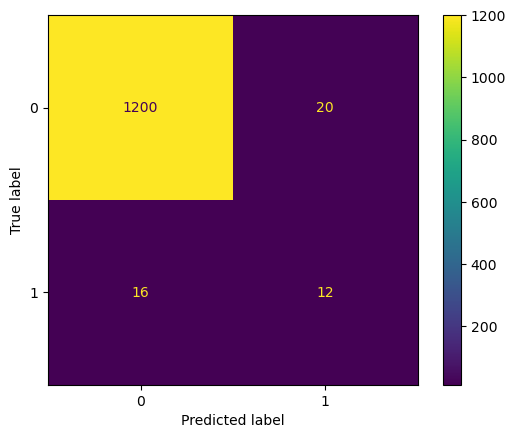

In [11]:
#note that drop() creates a copy of the data(unless inplace=True) and does not affect strat_train_set
rba_train_X = strat_train_set.drop('Is Attack', axis=1)
rba_train_Y = strat_train_set["Is Attack"].copy()

rba_test_X = strat_test_set.drop('Is Attack', axis=1)
rba_test_Y = strat_test_set["Is Attack"].copy()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(rba_train_X, rba_train_Y)

pred_y = classifier.predict(rba_test_X)

results = confusion_matrix(rba_test_Y, pred_y)
error = zero_one_loss(rba_test_Y, pred_y)

print(results)
print(error)
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(results).plot()

### Applying SelectFromModel() to find out which features are the most important and should be kept.

In [12]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(classifier, prefit=True)
train_x_new = sfm.transform(rba_train_X)
print("Original num features: {}, selected num features: {}"
      .format(rba_train_X.shape[1], train_x_new.shape[1]))

indices = np.argsort(classifier.feature_importances_)[::-1]
for idx, i in enumerate(indices):
    print("{}.\t{} - {}".format(idx, rba_train_X.columns[i], classifier.feature_importances_[i]))

Original num features: 11, selected num features: 4
0.	ASN - 0.328187565838096
1.	User ID - 0.20988883610067266
2.	Round-Trip Time [ms] - 0.11424891404639922
3.	millisecond - 0.09323877168079232
4.	second - 0.06950876895392852
5.	minute - 0.05162278885235484
6.	hour - 0.047457382442791025
7.	day - 0.045621050823482986
8.	month - 0.030667049186177672
9.	Login Successful - 0.008550306590132397
10.	Is Failed Login - 0.001008565485172226


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Login counter, and year have no relevance, so we can drop those. 
#### There is class imbalance, which also needs to be taken care of. It makes more sense in a multi class scenario, and not for binary classification (I still wanted to try, since this is just a test code ;) )

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=0)
train_x_sm, train_Y_sm = sm.fit_resample(rba_train_X, rba_train_Y)
print(pd.Series(train_Y_sm).value_counts())


########Oversample and then under sample to balance sampling across multiple classes ##########
from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(pd.Series(rba_train_Y).value_counts().sum()/2)

ratio = {0: mean_class_size,
         1: mean_class_size}

rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0, replacement=True)
train_x_rus, train_Y_rus = rus.fit_resample(train_x_sm, train_Y_sm)
print(pd.Series(train_Y_rus).value_counts())

0    12452
1    12452
Name: Is Attack, dtype: int64
0    6333
1    6333
Name: Is Attack, dtype: int64


### Running the classifier again, after resampling to take care of class imbalance

In [14]:

classifier_balancedClasses = DecisionTreeClassifier(random_state=17)
#classifier_balancedClasses.fit(train_x_sm, train_Y_sm)
classifier_balancedClasses.fit(train_x_rus, train_Y_rus)

pred_y = classifier_balancedClasses.predict(rba_test_X)

results = confusion_matrix(rba_test_Y, pred_y)
error = zero_one_loss(rba_test_Y, pred_y)

print("results  with class balancing : ", results)
print("Error : ",error)

results  with class balancing :  [[1149   71]
 [  11   17]]
Error :  0.0657051282051282


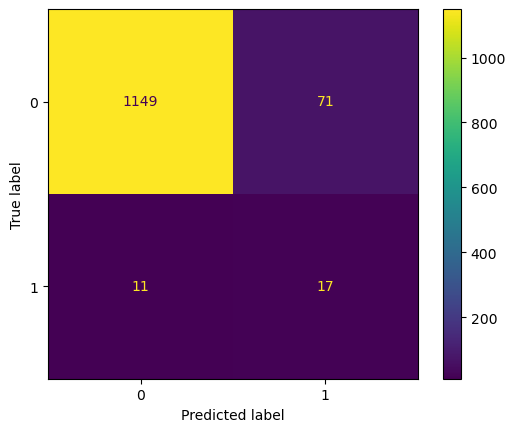

In [15]:
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(results).plot()

### Confusion Matrix
                     | Positive Prediction | Negative Prediction|
|Negative Class(Benign) | True Negative (TN)  | False Positive (FP)|

|Positive Class(Attack) | False Negative (FN) | True Positive (TP)|

##### Purpose of confusion matrix: To get an idea of number of times instances of class A are identified as class B.
Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

The first row of this matrix considers non-attack(0, Benign) login attempts (<B>the negative class</B>): 1149 of them were correctly classified as benign (they are called <B>true negatives</B>), while the remaining 71 were wrongly classified as attack (<B>false positives</B>).

The second row considers the attack cases (<B>the positive class</B>): 24 classified as benign (<B>false negatives</B>), while the remaining 19 were correctly classified as attack (<B>true positives</B>)

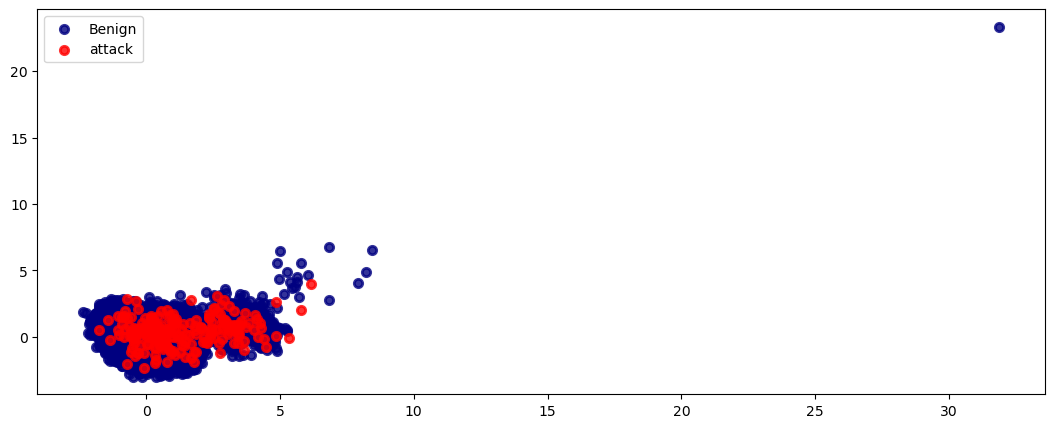

In [16]:
#Unsupervised Learning
# First, let's visualize the dataset (only numeric cols)

from sklearn.decomposition import PCA

# uncomment following line. Based on feature importance, the column 'year' was removed
numeric_cols.remove('year')
############################################################################
# Use PCA to reduce dimensionality so we can visualize the dataset on a 2d plot
pca = PCA(n_components=2)
rba_train_x_pca_cont = pca.fit_transform(rba_train_X[numeric_cols])
category ={0:'Benign',1:'attack'}

plt.figure(figsize=(13,5))
colors = ['navy', 'red']

for color, cat in zip(colors, category.keys()):
    plt.scatter(rba_train_x_pca_cont[rba_train_Y==cat, 0], rba_train_x_pca_cont[rba_train_Y==cat, 1],
                color=color, alpha=.8, lw=2, label=category[cat])
'''rba_train_x_pca_cont[rba_train_Y==cat, 0] returns a ndarray of index(column) 0 of all rba_train_x_pca_cont rows where the label is 
equal to the value of cat
In the first iteration of loop, cat=0, so scatter plot of the two pca components of rba_train_X with label 0(non attack)'''
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

### TODO (Clustering implementation that takes care of categorical data, using Jaccard similarity index)